In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_excel('tsdata1 .xlsx',index_col=0,parse_dates=True)

In [7]:
data

,IT,EXOG1,EXOG2
Date,,,
2013-10-01,151.996076,17.54,11.20
2013-10-02,148.865675,17.39,11.07
2013-10-03,155.963230,16.16,12.73
2013-10-04,164.411660,16.22,10.53
2013-10-05,131.043380,16.04,10.88
...,...,...,...
2020-08-18,133.519627,21.21,7.23
2020-08-19,136.533857,20.49,7.74
2020-08-20,137.859132,22.50,7.30


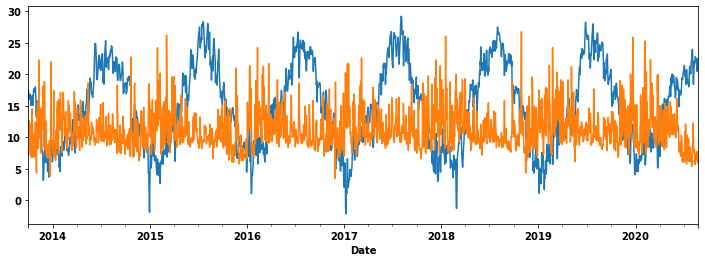

In [8]:
data['EXOG1'].plot(figsize=(12,4))
data['EXOG2'].plot(figsize=(12,4))

# Sarimax

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [10]:
data['const']=1

In [11]:
data

,IT,EXOG1,EXOG2,const
Date,,,,
2013-10-01,151.996076,17.54,11.20,1
2013-10-02,148.865675,17.39,11.07,1
2013-10-03,155.963230,16.16,12.73,1
2013-10-04,164.411660,16.22,10.53,1
2013-10-05,131.043380,16.04,10.88,1
...,...,...,...,...
2020-08-18,133.519627,21.21,7.23,1
2020-08-19,136.533857,20.49,7.74,1
2020-08-20,137.859132,22.50,7.30,1


In [15]:
model = SARIMAX(data['IT'],
               exog=data[['EXOG1','EXOG2','const']],
               order=(2, 0, 2), 
               seasonal_order=(1, 1, 1, 7)).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


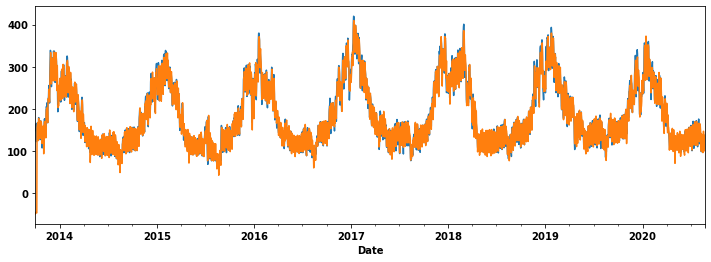

In [20]:
data['IT'].plot(figsize=(12,4))
model.predict(start=data.index[0],
             end=data.index[-1],
             exog=data[['EXOG1','EXOG2','const']]).plot()

In [21]:
from statsmodels.tsa.stattools import adfuller
from itertools import product

In [22]:
p = range(0, 3)
q = range(0, 3)
P = range(0, 3)
Q = range(0, 3)

In [23]:
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
len(parameters_list)

81

In [24]:
list_of_aic=[]
for i in range(len(parameters_list)): #для кажного набора определяем критерий Акаике
    model = SARIMAX(data['IT'],
               exog=data[['EXOG1','EXOG2','const']],
               order=(parameters_list[i][0], 1, parameters_list[i][1]), 
               seasonal_order=(parameters_list[i][2], 1, parameters_list[i][3], 7)).fit()
    list_of_aic.append(model.aic)

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency i

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No f

In [25]:
minIndex = list_of_aic.index(min(list_of_aic)) #находим минимальное значение критерия в полученном списке
print(parameters_list[minIndex],list_of_aic[minIndex]) #набор параметров и соответствующее ему мин значение критерия

(2, 2, 1, 1) 19780.33782112565


In [26]:
model_best = SARIMAX(data['IT'],
               exog=data[['EXOG1','EXOG2','const']], 
                order=(parameters_list[minIndex][0], 1, parameters_list[minIndex][1]), 
                seasonal_order=(parameters_list[minIndex][2], 1, parameters_list[minIndex][3], 7)).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [27]:
model_best.aic

19780.33782112565

In [28]:
model_best.params

EXOG1       -2.438787
EXOG2       -0.450991
const       -0.000002
ar.L1        0.362487
ar.L2        0.263049
ma.L1       -0.361096
ma.L2       -0.443055
ar.S.L7      0.218110
ma.S.L7     -0.995316
sigma2     151.840971
dtype: float64

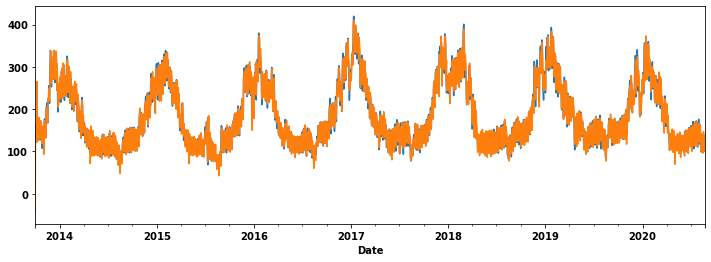

In [29]:
data['IT'].plot(figsize=(12,4))
model_best.predict(start=data.index[0],
             end=data.index[-1],
             exog=data[['EXOG1','EXOG2','const']]).plot(figsize=(12,4))

In [67]:
model2 = SARIMAX(data['IT'],
               exog=data[['EXOG1','EXOG2','const']],
               order=(2, 1, 2), 
               seasonal_order=(1, 1, 1, 7)).fit()

C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Nastya\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


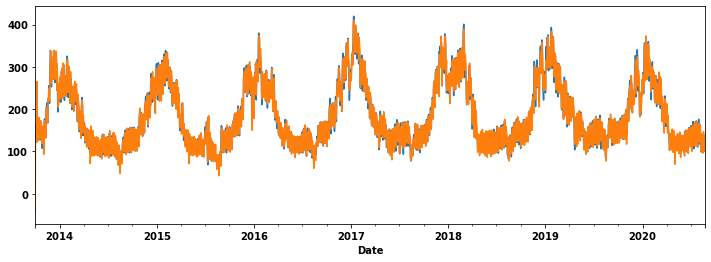

In [68]:
data['IT'].plot(figsize=(12,4))
model2.predict(start=data.index[0],
             end=data.index[-1],
             exog=data[['EXOG1','EXOG2','const']]).plot(figsize=(12,4))

In [238]:
temp1=data['EXOG1']
temp2=data['EXOG2']

In [239]:
mean_temp1=temp1.groupby([temp1.index.month,
              temp1.index.day]).mean()
mean_temp2=temp2.groupby([temp2.index.month,
              temp2.index.day]).mean()

In [240]:
exog=pd.DataFrame(mean_temp1[1][:14])
exog['EXOG2']=mean_temp2[1][:14]
exog['const']=1

In [241]:
exog

,EXOG1,EXOG2,const
Date,,,
1,5.555714,11.175714,1
2,6.212857,11.741429,1
3,6.642857,13.087143,1
4,6.704286,12.838571,1
5,6.634286,14.721429,1
6,5.564286,12.830000,1
7,5.538571,11.408571,1
8,6.561429,11.030000,1
9,7.198571,11.558571,1


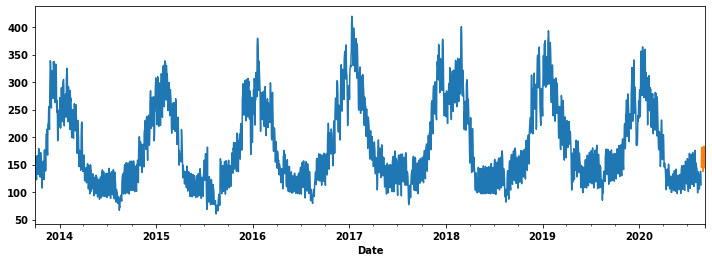

In [243]:
data['IT'].plot(figsize=(12,4))
model2.predict(start='2020-08-23',end='2020-09-05',exog=exog).plot(figsize=(12,4))

# Prophet

In [74]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [244]:
data_prophet = data[['IT']]
data_prophet = data_prophet.reset_index()
data_prophet.columns = ['ds', 'y']

In [245]:
model = Prophet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=True)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(data_prophet)

In [246]:
future = model.make_future_dataframe(periods=14)

In [247]:
forecast = model.predict(future)

In [248]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2013-10-01,144.610455,117.029208,172.044738
1,2013-10-02,146.989874,118.307305,175.383570
2,2013-10-03,146.994622,118.277322,174.225610
3,2013-10-04,140.125627,108.778594,171.333531
4,2013-10-05,108.276158,79.391073,136.058353
...,...,...,...,...
2527,2020-09-01,145.930756,118.173787,174.019273
2528,2020-09-02,148.362399,118.451954,178.410155
2529,2020-09-03,148.949109,121.310235,177.262083
2530,2020-09-04,143.701826,114.071235,173.604895


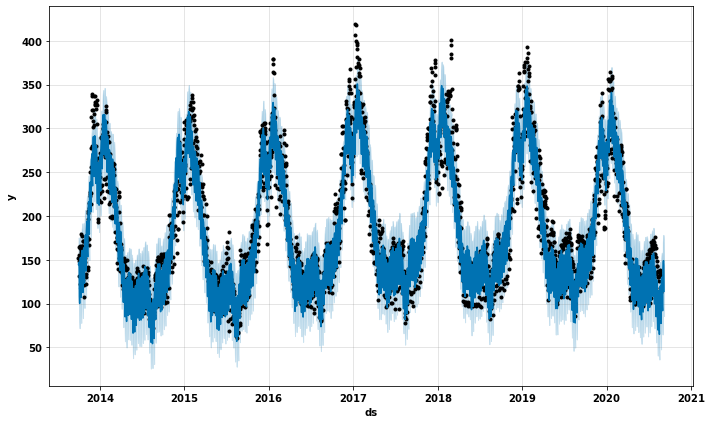

In [249]:
model.plot(forecast)
plt.show()

# Сравнение

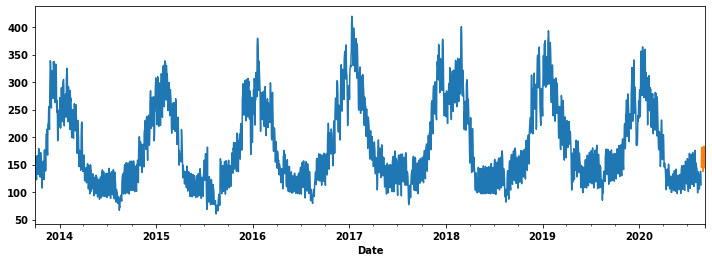

In [250]:
data['IT'].plot(figsize=(12,4))
model2.predict(start='2020-08-23',end='2020-09-05',exog=exog).plot(figsize=(12,4))

In [251]:
model2.mse

173.91259909675406

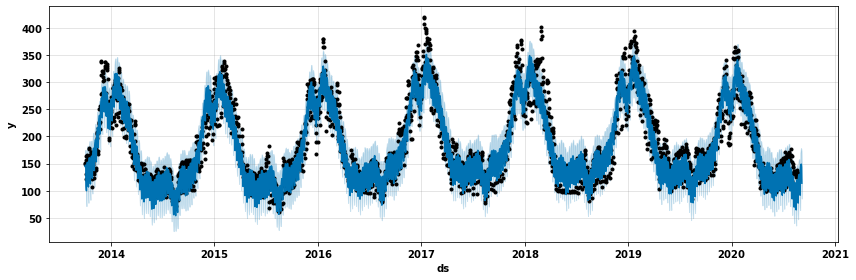

In [252]:
model.plot(forecast,figsize=(12,4))
plt.show()

In [253]:
from sklearn.metrics import mean_squared_error

In [254]:
metric_df = forecast.set_index('ds')[['yhat']].join(data_prophet.set_index('ds').y).reset_index()

In [255]:
metric_df.dropna(inplace=True)

In [256]:
mean_squared_error(metric_df.y, metric_df.yhat)

501.03738628417454